<a href="https://colab.research.google.com/github/Lencho123/Machine-Learning/blob/main/ML_assigmt_I_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of dataset: (303, 14)

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Statistical Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.

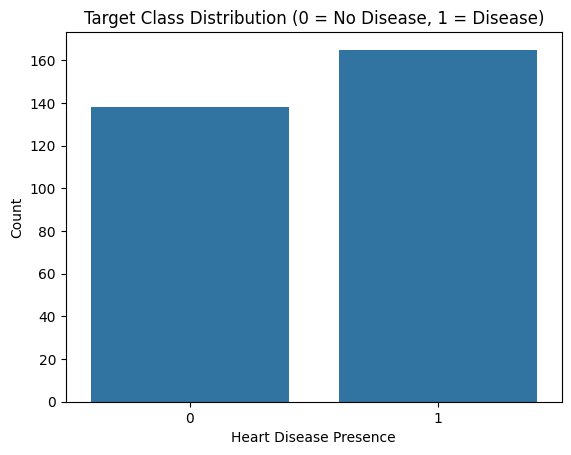

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

# Display basic information
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Summary statistics
print("\nStatistical Summary:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Heart Disease Presence")
plt.ylabel("Count")
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Dataset is already clean — no NaNs. But let’s confirm data types.
print("\nData types:\n", df.dtypes)

# 2. Encode categorical variables
# 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', and 'ca' are categorical/numeric-encoded
# We'll use one-hot encoding for 'cp', 'restecg', 'slope', 'thal' since they are nominal categories

df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# 3. Normalize/Standardize numerical features
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# This scaler is designed to transform your data such that it has zero mean and unit variance.
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Final dataset after encoding and scaling
print("\nFinal shape after encoding and scaling:", df_encoded.shape)
print("\nColumns:\n", df_encoded.columns)

# 4. Split into features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# 5. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Missing values before cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Final shape after encoding and scaling: (303, 20)

Columns:
 Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

Training set shape: (242, 19)
Testing set shape: (61, 19)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name} Model Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)



📌 Logistic Regression Model Evaluation
Accuracy: 0.9016393442622951
Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


📌 Decision Tree Model Evaluation
Accuracy: 0.819672131147541
Confusion Matrix:
 [[25  4]
 [ 7 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



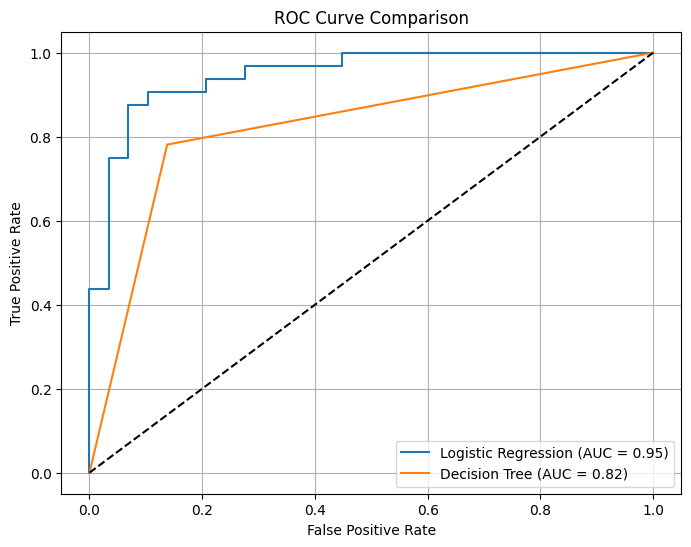

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC
y_probs_log = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
y_probs_tree = tree_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)

auc_log = roc_auc_score(y_test, y_probs_log)
auc_tree = roc_auc_score(y_test, y_probs_tree)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
